In [647]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [648]:
cm = 10
mN1 = 1
s_file = uproot.open(f'../features/signal_reco_E-{cm}TeV_N-{mN1}TeV.root')
b_file = uproot.open(f'../features/background_reco_E-{cm}TeV.root')


In [649]:
df_s = pd.DataFrame(np.array(s_file['t']['features'].array()))
df_b = pd.DataFrame(np.array(b_file['t']['features'].array()))

df_s['target']=1
df_b['target']=0

df = pd.concat([df_s, df_b])
df_o = df.copy()
df_s_o = df_s.copy()
df_b_o = df_b.copy()

In [650]:
def plot_pt_eta_phi_M(df, particle, cm=1, mN1=1):
    
    if (particle == 'Jet1') or (particle == 'Jet2'):
        df = df[df.nJets==2]
    elif (particle == 'JJ'):
        df = df[df.nJets==1]
    
    if (len(df) == 0):
        print(particle, ": No samples")
        return
    
    df_s = df[df.target==1]
    df_b = df[df.target!=1]
    
    try:
        plt.figure(figsize=(18, 4))

        range_ = [0,800]
        ax1 = plt.subplot(141)
        ax1.hist(df_s['pt'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
        ax1.hist(df_s['pt'+particle+'True'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C0', linestyle='--');
        ax1.hist(df_b['pt'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C1');
        ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                      r'$p_T$ of '+particle)

        range_ = [-5,5]
        ax2 = plt.subplot(142)
        ax2.hist(df_s['eta'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
        ax2.hist(df_s['eta'+particle+'True'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C0', linestyle='--');
        ax2.hist(df_b['eta'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C1');
        ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                      r'$\eta$ of '+particle)

        range_ = [-6,6]
        ax3 = plt.subplot(143)
        ax3.hist(df_s['phi'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
        ax3.hist(df_s['phi'+particle+'True'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C0', linestyle='--');
        ax3.hist(df_b['phi'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C1');
        ax3.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                      r'$\phi$ of '+particle)


        
        if particle == 'JJ':
            range_ = [0,120]
            col = 'm'
        elif particle == 'N':
            range_ = [0,1000*mN1*1.1]
            col = 'm'
        else:
            if cm == 10:
                range_ = [0, 5000]
            elif cm == 3:
                range_ = [0,2000]
            col = 'E'
            
        ax4 = plt.subplot(144)
        
        ax4.hist(df_s[col+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
        ax4.hist(df_s[col+particle+'True'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C0', linestyle='--');
        ax4.hist(df_b[col+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C1');
        ax4.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                      f'${col}$ of '+particle)

        

        ax1.legend() 
        plt.show()
        
    except ZeroDivisionError:
        print("No samples")



In [651]:
def plot_them(df):
    plot_pt_eta_phi_M(df, 'Lep', cm, mN1)
    plot_pt_eta_phi_M(df, 'Jet1', cm, mN1)
    plot_pt_eta_phi_M(df, 'Jet2', cm, mN1)
    plot_pt_eta_phi_M(df, 'JJ', cm, mN1)
    plot_pt_eta_phi_M(df, 'N', cm, mN1)

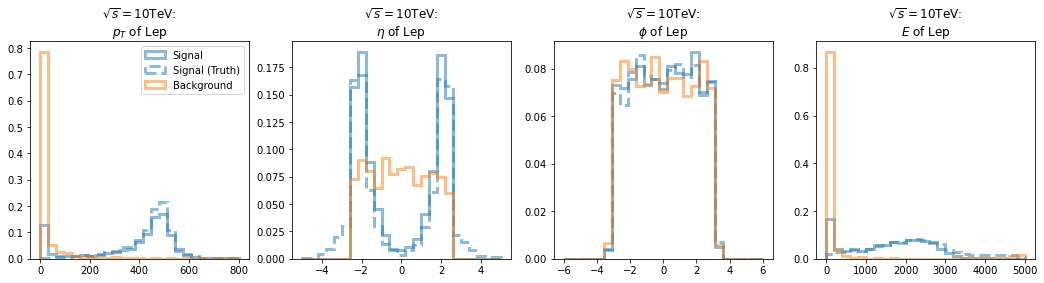

Jet1 : No samples
Jet2 : No samples


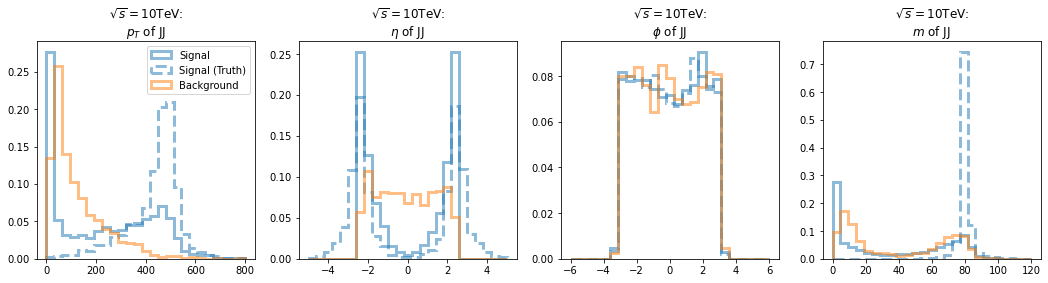

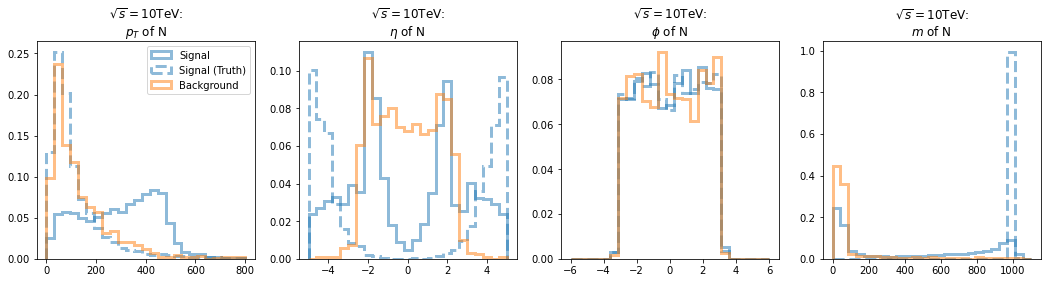

In [652]:
plot_them(df_o)

In [653]:
def cut_flow(df, col, upper=1e10, lower=-1e10, plot=False):
    print('Before cut:')
    s_before = len(df[df.target==1])
    b_before = len(df[df.target!=1])
    print('S samples:', s_before)
    print('B samples:', b_before)
    
    df = df[df[col] <= upper]
    df = df[df[col] >= lower]
    s_after = len(df[df.target==1])
    b_after = len(df[df.target!=1])
    print('\nAfter cut:')
    print(f'S samples: {s_after}/{s_before} ({round(100*(s_after/s_before),2)}%)')
    print(f'B samples: {b_after}/{b_before} ({round(100*(b_after/b_before),2)}%)')
    
    if plot:
        plot_them(df)
        
    return df
    

Before cut:
S samples: 3098
B samples: 1225

After cut:
S samples: 2482/3098 (80.12%)
B samples: 117/1225 (9.55%)


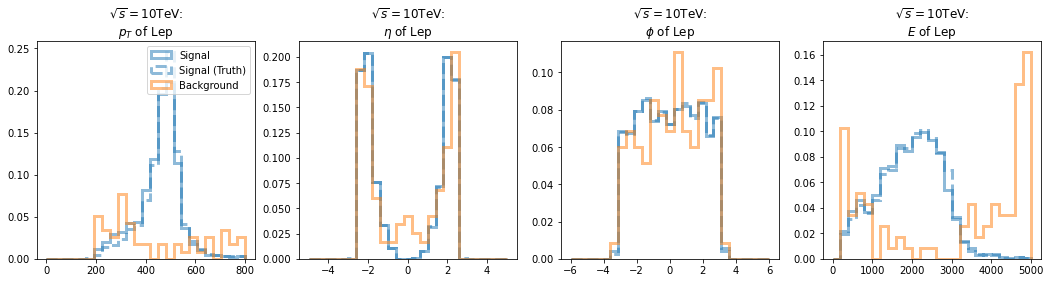

Jet1 : No samples
Jet2 : No samples


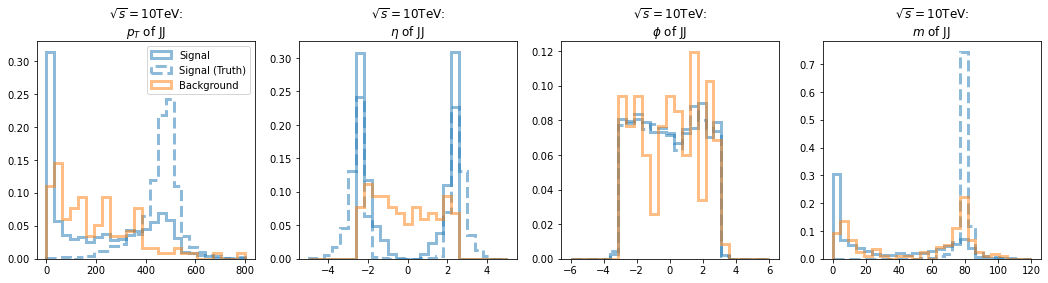

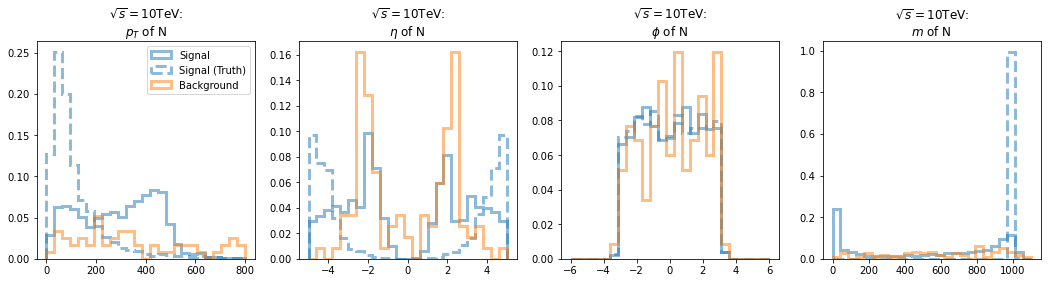

In [654]:
df = cut_flow(df_o, 'ptLep', lower=200, plot=True)

Before cut:
S samples: 2482
B samples: 117

After cut:
S samples: 1349/2482 (54.35%)
B samples: 64/117 (54.7%)


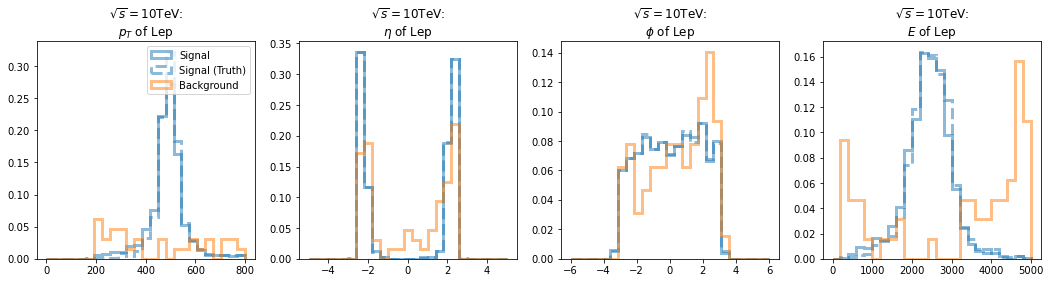

Jet1 : No samples
Jet2 : No samples


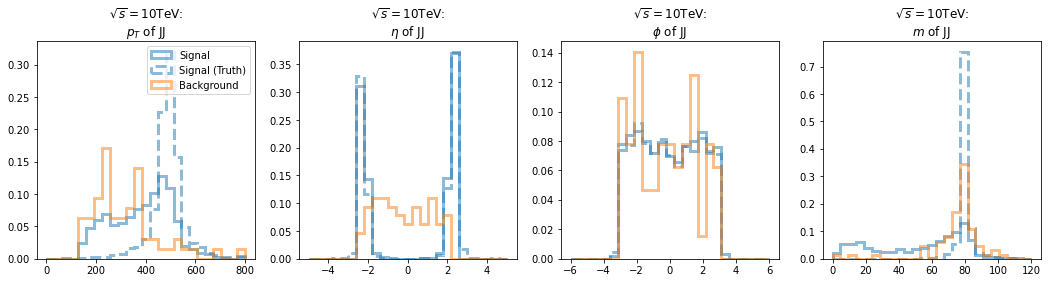

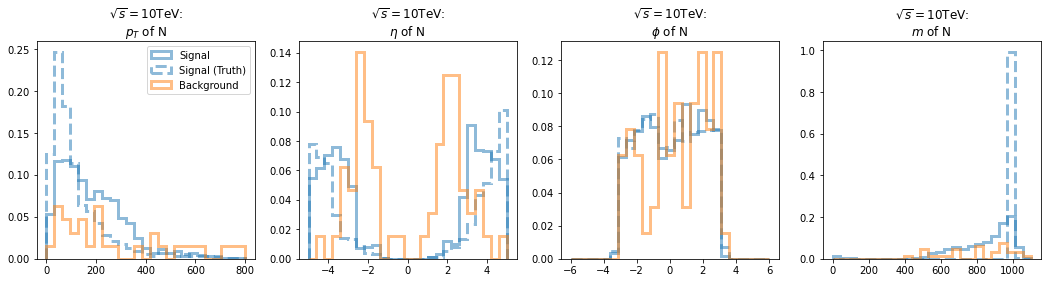

In [655]:
df = cut_flow(df, 'ptJJ', lower=150, plot=True)

Before cut:
S samples: 1349
B samples: 64

After cut:
S samples: 462/1349 (34.25%)
B samples: 46/64 (71.88%)


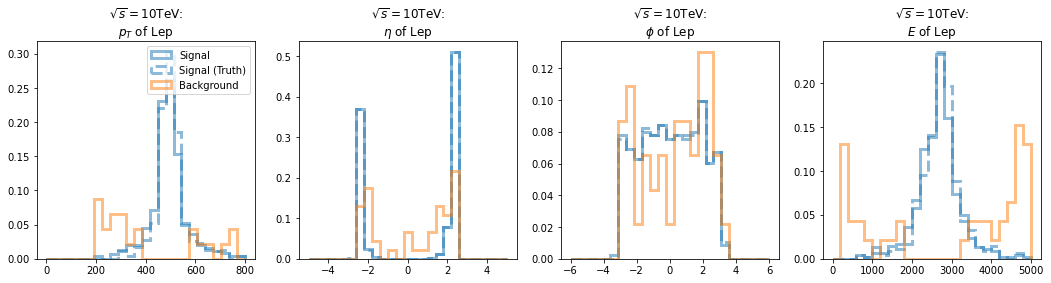

Jet1 : No samples
Jet2 : No samples


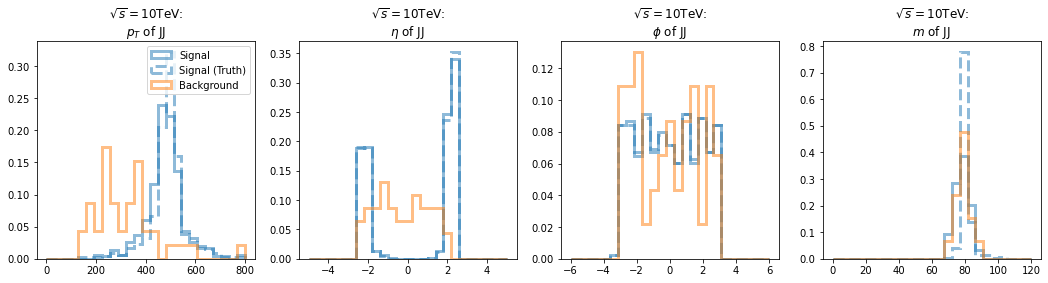

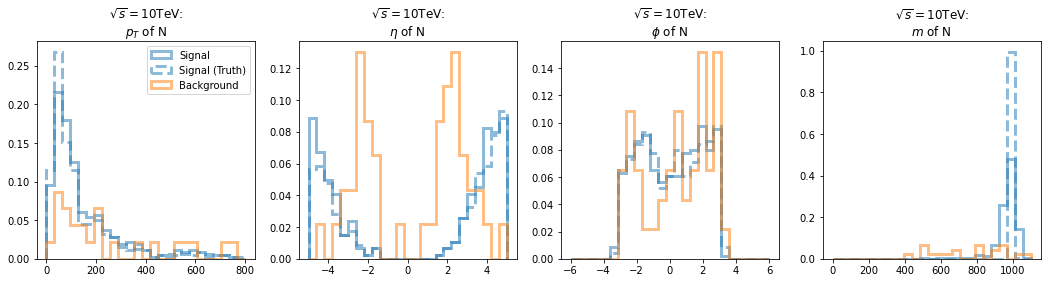

In [656]:
mW = 80.379
widthW = 2.085

df = cut_flow(df, 'mJJ', upper=mW+5*widthW ,lower=mW-5*widthW, plot=True)

In [639]:
df_s = df[df.target==1]
df_b = df[df.target!=1]

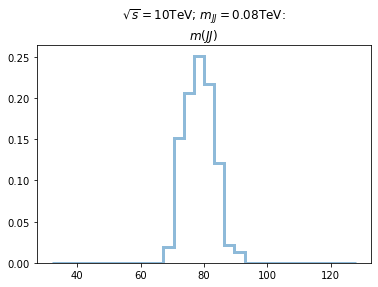

In [640]:
mJJ = 0.08
width_ = 0.6
width_num = 0.075
# width_num = 0.025
# lower_b, upper_b = mJJ*(1-width_num)*1000, mJJ*(1+width_num)*1000

sim_num=10000

range_ = [mJJ*(1-width_)*1000, mJJ*(1+width_)*1000]
bins_ = 30

plt.hist(df_s['mJJ'], weights=[1/len(df_s)]*len(df_s), bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3);
# plt.hist(df_b['mJJ'], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3);
plt.title(r'$\sqrt{s}=$'+str(cm)+'TeV; '+'$m_{JJ}=$'+str(mJJ)+'TeV:\n'+
          r'$m(JJ)$');

# plt.axvline(lower_b, color='red')
# plt.axvline(upper_b, color='red')

# print("From: {} to {} TeV".format(lower_b, upper_b))
# print("Contains {}/{} = {:.2f}% of the reconstructed events".format(len(df_s[(df_s['mJJ'] >= lower_b) & (df_s['mJJ'] <= upper_b)]), len(df_s_o), 100*len(df_s[(df_s['mJJ'] >= lower_b) & (df_s['mJJ'] <= upper_b)])/len(df_s_o)))
# print("Contains {}/{} = {:.2f}% of total simulations ".format(len(df_s_o[(df_s_o['mJJ'] >= lower_b) & (df_s_o['mJJ'] <= upper_b)]), sim_num, 100*len(df_s_o[(df_s_o['mJJ'] >= lower_b) & (df_s_o['mJJ'] <= upper_b)])/sim_num, sim_num))



From: 925.0 to 1075.0 TeV
Contains 407/3098 = 13.14% of the reconstructed events
Contains 590/10000 = 5.90% of total simulations 


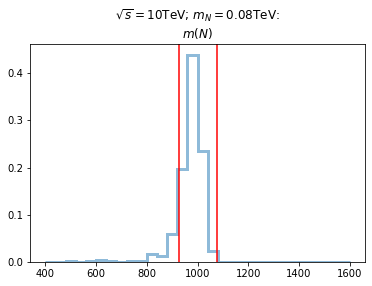

In [641]:
mN = 0.08
width_ = 0.6
width_num = 0.075
lower_b, upper_b = mN1*(1-width_num)*1000, mN1*(1+width_num)*1000

sim_num=10000

range_ = [mN1*(1-width_)*1000, mN1*(1+width_)*1000]
bins_ = 30

plt.hist(df_s['mN'], weights=[1/len(df_s)]*len(df_s), bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3);
# plt.hist(df_b['mN'], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3);
plt.title(r'$\sqrt{s}=$'+str(cm)+'TeV; '+'$m_{N}=$'+str(mN)+'TeV:\n'+
          r'$m(N)$');

plt.axvline(lower_b, color='red')
plt.axvline(upper_b, color='red')

print("From: {} to {} TeV".format(lower_b, upper_b))
print("Contains {}/{} = {:.2f}% of the reconstructed events".format(len(df_s[(df_s['mN'] >= lower_b) & (df_s['mN'] <= upper_b)]), len(df_s_o), 100*len(df_s[(df_s['mN'] >= lower_b) & (df_s['mN'] <= upper_b)])/len(df_s_o)))
print("Contains {}/{} = {:.2f}% of total simulations ".format(len(df_s_o[(df_s_o['mN'] >= lower_b) & (df_s_o['mN'] <= upper_b)]), sim_num, 100*len(df_s_o[(df_s_o['mN'] >= lower_b) & (df_s_o['mN'] <= upper_b)])/sim_num, sim_num))



In [624]:
df_o[df_o.nJets==2]

,iEvt,ptLep,etaLep,phiLep,ELep,ptJet1,etaJet1,phiJet1,EJet1,ptJet2,...,DeltaRjjlTrue,ptJJTrue,etaJJTrue,phiJJTrue,mJJTrue,mNTrue,ptNTrue,etaNTrue,phiNTrue,target
